In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/machine learning/Prediction of Diabetes with KNN Algorithm/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabet_patient=data[data.Outcome==1]
healthy=data[data.Outcome==0]

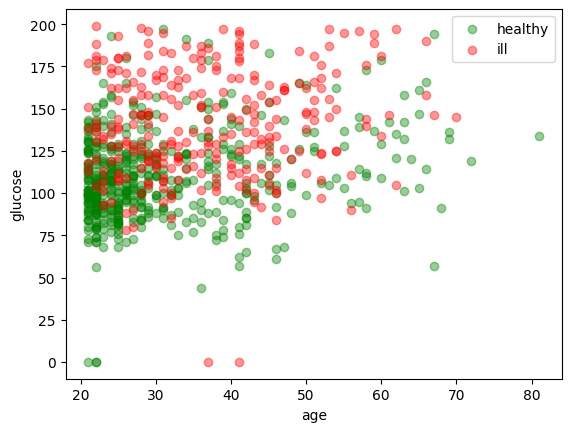

In [ ]:
plt.scatter(healthy.Age,healthy.Glucose,color="green",label="healthy",alpha=0.4)
plt.scatter(diabet_patient.Age,diabet_patient.Glucose,color="red",label="ill",alpha=0.4)
plt.xlabel("age")
plt.ylabel("glucose")
plt.legend()
plt.show()



In [ ]:
x1=data.iloc[:,0:-1]
y1=data.iloc[:,-1].values

In [ ]:
x1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y1

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=43)


In [ ]:
sc=StandardScaler()

In [ ]:
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)

In [ ]:
knn=KNeighborsClassifier(5)

In [ ]:
knn.fit(xtrain1,ytrain)

KNeighborsClassifier()

In [ ]:
thead=knn.predict(xtest1)

In [ ]:
knn.score(xtest1,ytest)

0.7142857142857143

In [ ]:
scorelite=[]
for i in range(1,30):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(xtrain1,ytrain)
  scorelite.append(knn2.score(xtest1,ytest))

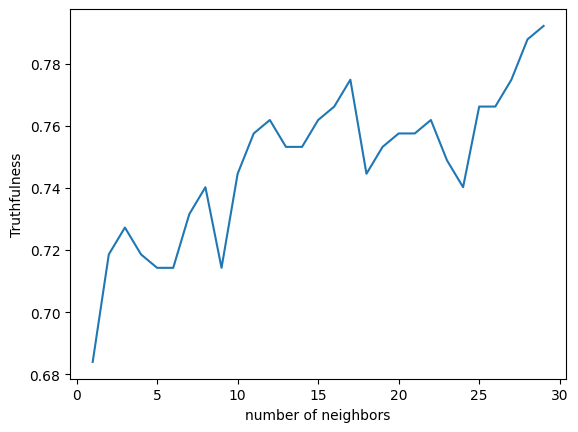

In [ ]:
plt.plot(range(1,30),scorelite)
plt.xlabel("number of neighbors")
plt.ylabel("Truthfulness")
plt.show()

In [ ]:
cm = confusion_matrix(ytest,thead)
cm

array([[124,  28],
       [ 38,  41]])